In [12]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = r"D:\CNTT\py_for_da\crawl_data_analyst\tiki\dienthoai_maytinhbang"
os.listdir(path)


['dienthoai',
 'dienthoaiban',
 'dienthoaiphothong',
 'maydocsach',
 'maytinhbang',
 'tk_dtban_all_ed.csv',
 'tk_dtphothong_all.ipynb',
 'tk_dtphothong_all_ed.csv',
 'tk_dtsmartphone_all_ed.csv',
 'tk_maydocsach_all_ed.csv',
 'tk_maytinhbang_all_ed.csv']

In [3]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + '\\' + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)

df_all = result
df_all.to_csv("tk_dienthoai_all.csv", index="False")

In [5]:
df_all = df_all.drop('index', axis=1)

In [6]:
df_all

,Unnamed: 0,title,price,link_item,discount,sales,brand,category,revenue
0,0,(Hàng chính hãng) Điện thoại bàn hữu tuyến H2P...,2220000,https://tiki.vn/dien-thoai-ban-huu-tuyen-h2p-h...,NaN,NaN,Alcatel,dienthoaiban,NaN
1,1,Điện Thoại Bàn Homephone lắp sim - Lắp Tất Cả ...,650000,https://tiki.vn/dien-thoai-ban-homephone-lap-s...,NaN,58.0,China Mobile,dienthoaiban,37700000.0
2,2,Điện thoại Ip phone Cisco CP-7945G chính hãng,4500000,https://tiki.vn/dien-thoai-ip-phone-cisco-cp-7...,NaN,NaN,Cisco,dienthoaiban,NaN
3,3,Cisco Unified IP Phone 7962G - Hàng chính hãng,4900000,https://tiki.vn/cisco-unified-ip-phone-7962g-h...,NaN,NaN,Cisco,dienthoaiban,NaN
4,4,Cisco Unified IP Phone CP-7821-K9 - Hàng chính...,2580000,https://tiki.vn/cisco-unified-ip-phone-cp-7821...,NaN,NaN,Cisco,dienthoaiban,NaN
...,...,...,...,...,...,...,...,...,...
71,71,Điện thoại Xiaomi Redmi 13C (6GB/128GB) - Hàng...,2890000,https://tiki.vn/dien-thoai-xiaomi-redmi-13c-6g...,-12%,47.0,NaN,maytinhbang,135830000.0
72,72,Máy tính bảng Xiaomi Pad 6 (8GB/128GB) - Hàng ...,8790000,https://tiki.vn/may-tinh-bang-xiaomi-pad-6-8gb...,-7%,8.0,NaN,maytinhbang,70320000.0
73,73,Máy tính bảng Xiaomi Redmi Pad (3GB/64GB) - Hà...,6290000,https://tiki.vn/may-tinh-bang-xiaomi-redmi-pad...,-15%,NaN,NaN,maytinhbang,NaN
74,74,Điện thoại Xiaomi Redmi A2 (2GB/32GB) - Hàng c...,1690000,https://tiki.vn/dien-thoai-xiaomi-redmi-a2-2gb...,-11%,1.0,NaN,maytinhbang,1690000.0


In [10]:
total_sales_by_category = df_all.groupby('category')['revenue'].sum()
total_sales = df_all['revenue'].sum()
print(total_sales_by_category)
print(total_sales)

category
dienthoaiban         2.614699e+09
dienthoaiphothong    6.621750e+08
maydocsach           2.424927e+10
maytinhbang          4.843995e+10
smartphone           5.805865e+11
Name: revenue, dtype: float64
656552605990.0


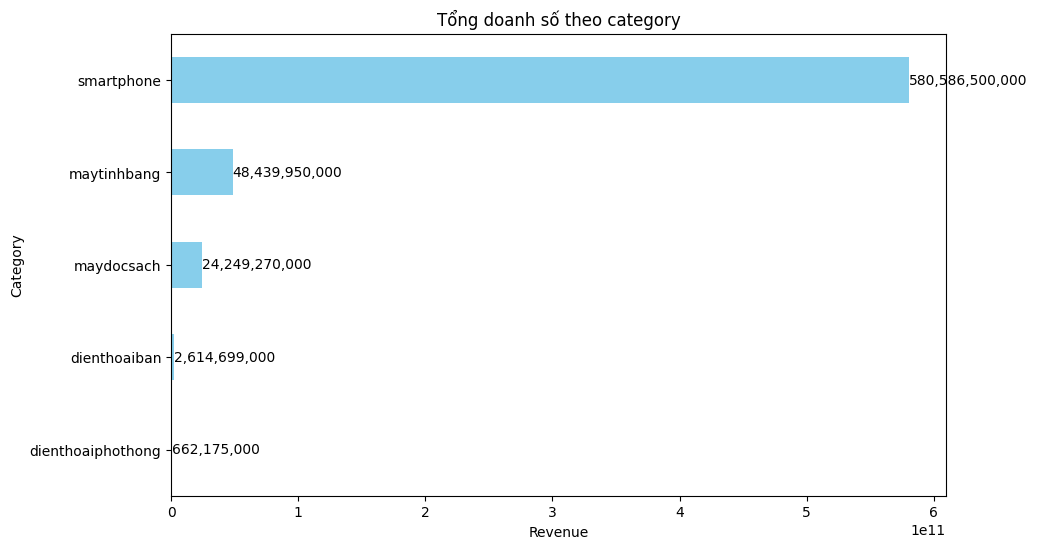

In [17]:
import matplotlib.pyplot as plt

# Dữ liệu tổng doanh số theo category
data = {'dienthoaiban': 2.614699e+09,
        'dienthoaiphothong': 6.621750e+08,
        'maydocsach': 2.424927e+10,
        'maytinhbang': 4.843995e+10,
        'smartphone': 5.805865e+11}
revenue_series = pd.Series(data)

# Vẽ biểu đồ cột nằm ngang
plt.figure(figsize=(10, 6))
bars = revenue_series.sort_values().plot(kind='barh', color='skyblue')

# Hiển thị giá trị doanh số trên từng cột
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', color='black')

plt.title('Tổng doanh số theo category')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()
